# T1 - Getting started

Installing and getting started with Covasim is quite simple. 

To install, just type `pip install covasim`. If it worked, you should be able to import Covasim with `import covasim as cv`.

The basic design philosophy of Covasim is: **common tasks should be simple**. For example:

- Defining parameters
- Running a simulation
- Plotting results

This tutorial walks you through how to do these things.

## Hello world

To create, run, and plot a sim with default options is just:

Covasim 2.0.2 (2020-02-01) — © 2021 by IDM
Initializing sim with 20000 people for 60 days
  Running 2020-03-01 ( 0/60) (0.51 s)  ———————————————————— 2%
  Running 2020-03-11 (10/60) (0.58 s)  •••————————————————— 18%
  Running 2020-03-21 (20/60) (0.64 s)  ••••••—————————————— 34%
  Running 2020-03-31 (30/60) (0.69 s)  ••••••••••—————————— 51%
  Running 2020-04-10 (40/60) (0.77 s)  •••••••••••••——————— 67%
  Running 2020-04-20 (50/60) (0.84 s)  ••••••••••••••••———— 84%
  Running 2020-04-30 (60/60) (0.93 s)  •••••••••••••••••••• 100%

Simulation summary:
   13576 cumulative infections
   11814 cumulative infectious
       0 cumulative tests
       0 cumulative diagnoses
    7139 cumulative recoveries
    7733 cumulative symptomatic cases
     515 cumulative severe cases
     134 cumulative critical cases
      24 cumulative deaths
       0 cumulative quarantined people



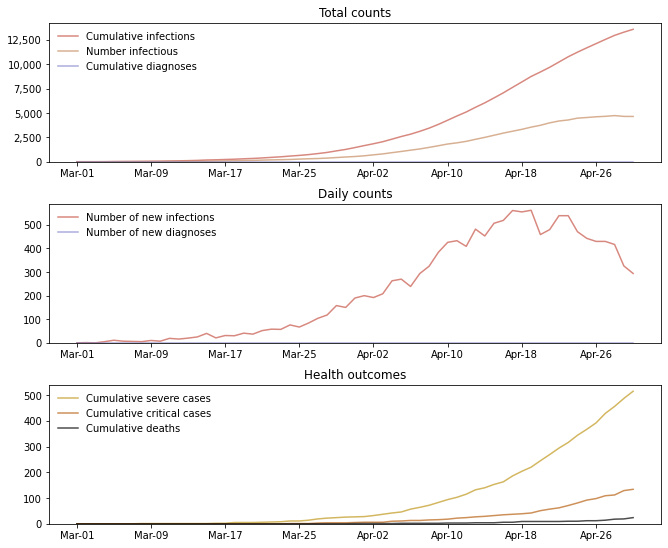

In [1]:
import covasim as cv

sim = cv.Sim()
sim.run()
fig = sim.plot()

## Defining parameters and running simulations

Parameters are defined as a dictionary. The most common parameters to modify are the population size, the initial number of people infected, and the start and end dates of the simulation. We can define those as:

In [2]:
pars = dict(
    pop_size = 50e3,
    pop_infected = 100,
    start_day = '2020-04-01',
    end_day = '2020-06-01',
)

Running a simulation is pretty easy. In fact, running a sim with the parameters we defined above is just:

In [3]:
sim = cv.Sim(pars)
sim.run()

Initializing sim with 50000 people for 61 days
  Running 2020-04-01 ( 0/61) (1.11 s)  ———————————————————— 2%
  Running 2020-04-11 (10/61) (1.23 s)  •••————————————————— 18%
  Running 2020-04-21 (20/61) (1.35 s)  ••••••—————————————— 34%
  Running 2020-05-01 (30/61) (1.48 s)  ••••••••••—————————— 50%
  Running 2020-05-11 (40/61) (1.64 s)  •••••••••••••——————— 66%
  Running 2020-05-21 (50/61) (1.82 s)  ••••••••••••••••———— 82%
  Running 2020-05-31 (60/61) (2.00 s)  •••••••••••••••••••— 98%
Simulation summary:
   36204 cumulative infections
   32296 cumulative infectious
       0 cumulative tests
       0 cumulative diagnoses
   21049 cumulative recoveries
   21266 cumulative symptomatic cases
    1455 cumulative severe cases
     391 cumulative critical cases
     103 cumulative deaths
       0 cumulative quarantined people



This will generate a results dictionary `sim.results`. For example, the number of new infections per day is `sim.results['new_infections']`.

Rather than creating a parameter dictionary, any valid parameter can also be passed to the sim directly. For example, exactly equivalent to the above is:

In [4]:
sim = cv.Sim(pop_size=50e3, pop_infected=100, start_day='2020-04-01', end_day='2020-06-01')
sim.run()

Initializing sim with 50000 people for 61 days
  Running 2020-04-01 ( 0/61) (1.15 s)  ———————————————————— 2%
  Running 2020-04-11 (10/61) (1.38 s)  •••————————————————— 18%
  Running 2020-04-21 (20/61) (1.53 s)  ••••••—————————————— 34%
  Running 2020-05-01 (30/61) (1.71 s)  ••••••••••—————————— 50%
  Running 2020-05-11 (40/61) (1.92 s)  •••••••••••••——————— 66%
  Running 2020-05-21 (50/61) (2.10 s)  ••••••••••••••••———— 82%
  Running 2020-05-31 (60/61) (2.29 s)  •••••••••••••••••••— 98%
Simulation summary:
   36204 cumulative infections
   32296 cumulative infectious
       0 cumulative tests
       0 cumulative diagnoses
   21049 cumulative recoveries
   21266 cumulative symptomatic cases
    1455 cumulative severe cases
     391 cumulative critical cases
     103 cumulative deaths
       0 cumulative quarantined people



You can mix and match too – pass in a parameter dictionary with default options, and then include other parameters as keywords (including overrides; keyword arguments take precedence). For example:

In [5]:
sim = cv.Sim(pars, pop_infected=10) # Use parameters defined above, except start with 10 infected people
sim.run()

Initializing sim with 50000 people for 61 days
  Running 2020-04-01 ( 0/61) (1.13 s)  ———————————————————— 2%
  Running 2020-04-11 (10/61) (1.24 s)  •••————————————————— 18%
  Running 2020-04-21 (20/61) (1.36 s)  ••••••—————————————— 34%
  Running 2020-05-01 (30/61) (1.47 s)  ••••••••••—————————— 50%
  Running 2020-05-11 (40/61) (1.59 s)  •••••••••••••——————— 66%
  Running 2020-05-21 (50/61) (1.71 s)  ••••••••••••••••———— 82%
  Running 2020-05-31 (60/61) (1.86 s)  •••••••••••••••••••— 98%
Simulation summary:
    7494 cumulative infections
    4662 cumulative infectious
       0 cumulative tests
       0 cumulative diagnoses
    1640 cumulative recoveries
    2902 cumulative symptomatic cases
     130 cumulative severe cases
      26 cumulative critical cases
       6 cumulative deaths
       0 cumulative quarantined people



## Plotting results

As you saw above, plotting the results of a simulation is rather easy too:

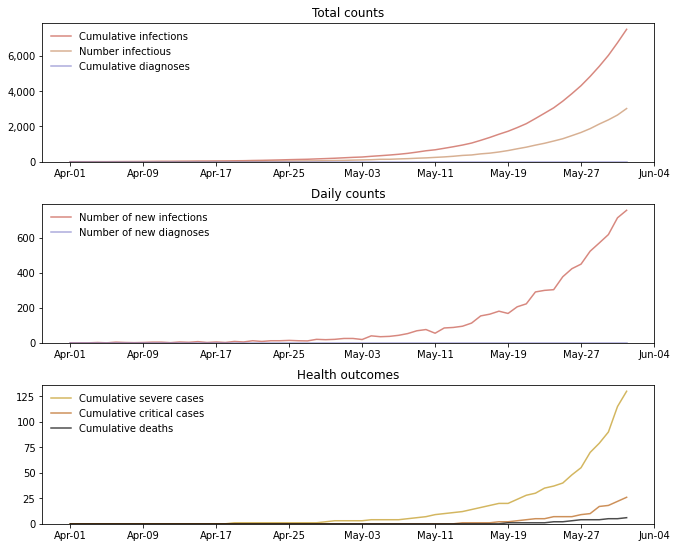

In [6]:
fig = sim.plot()

## Full usage example

Many of the details of this example will be explained in later tutorials, but to give you a taste, here's an example of how you would run two simulations to determine the impact of a custom intervention aimed at protecting the elderly.

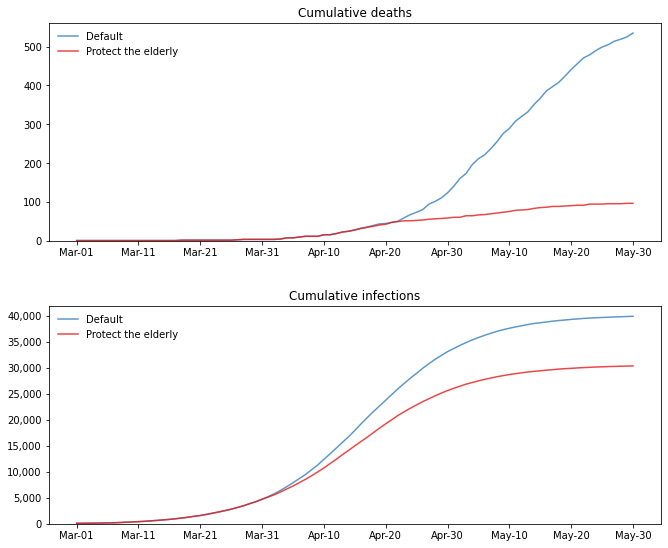

In [7]:
import covasim as cv

# Custom intervention -- see Tutorial 5
def protect_elderly(sim):
    if sim.t == sim.day('2020-04-01'):
        elderly = sim.people.age>70
        sim.people.rel_sus[elderly] = 0.0

pars = dict(
    pop_type = 'hybrid', # Use a more realistic population model
    location = 'japan', # Use population characteristics for Japan
    pop_size = 50e3, # Have 50,000 people total in the population
    pop_infected = 100, # Start with 100 infected people
    n_days = 90, # Run the simulation for 90 days
    verbose = 0, # Do not print any output
)

# Running with multisims -- see Tutorial 3
s1 = cv.Sim(pars, label='Default')
s2 = cv.Sim(pars, interventions=protect_elderly, label='Protect the elderly')
msim = cv.MultiSim([s1, s2])
msim.run()
fig = msim.plot(to_plot=['cum_deaths', 'cum_infections'])

In [8]:
cv.data.show_locations()

There are 280 age distributions and 176 household size distributions.

List of available locations (case insensitive):

{'age_distributions': ['Afghanistan',
                       'Albania',
                       'Algeria',
                       'Angola',
                       'Antigua and Barbuda',
                       'Argentina',
                       'Armenia',
                       'Aruba',
                       'Australia',
                       'Austria',
                       'Azerbaijan',
                       'Bahamas',
                       'Bahrain',
                       'Bangladesh',
                       'Barbados',
                       'Belarus',
                       'Belgium',
                       'Belize',
                       'Benin',
                       'Bhutan',
                       'Bolivia',
                       'Bolivia (Plurinational State of)',
                       'Bosnia and Herzegovina',
                       'Botswana',
   